<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/main/GL_DecA_G4_NLP1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :

1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [2]:
!pip install ftfy
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base

import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

! pip install langdetect
from langdetect import detect
from langdetect import detect
!pip install goslate
from goslate import Goslate
!pip install spacy
from collections import defaultdict
from bs4 import BeautifulSoup
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [3]:
dataset = pd.read_excel('/content/sample_data/input_data.xlsx')
dataset.shape

(8500, 4)

In [4]:
dataset.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [5]:
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [6]:
dataset.fillna(str(), inplace=True)
dataset.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [7]:
duplicate = dataset[dataset.duplicated()]

In [8]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 51 to 8405
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  83 non-null     object
 1   Description        83 non-null     object
 2   Caller             83 non-null     object
 3   Assignment group   83 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [9]:
dataset1 = dataset[~dataset.duplicated()]

In [10]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


In [11]:
dataset1.head(20)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


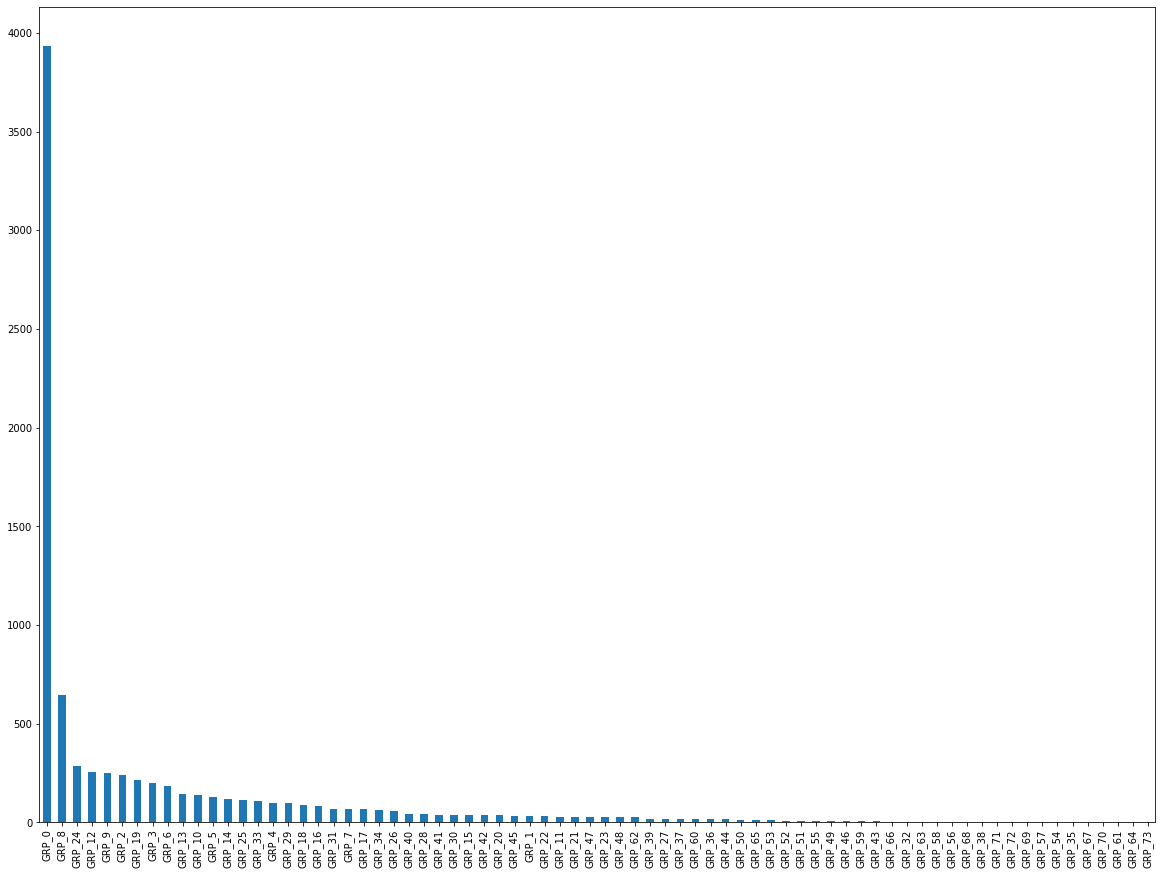

In [18]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts().plot(kind='bar')

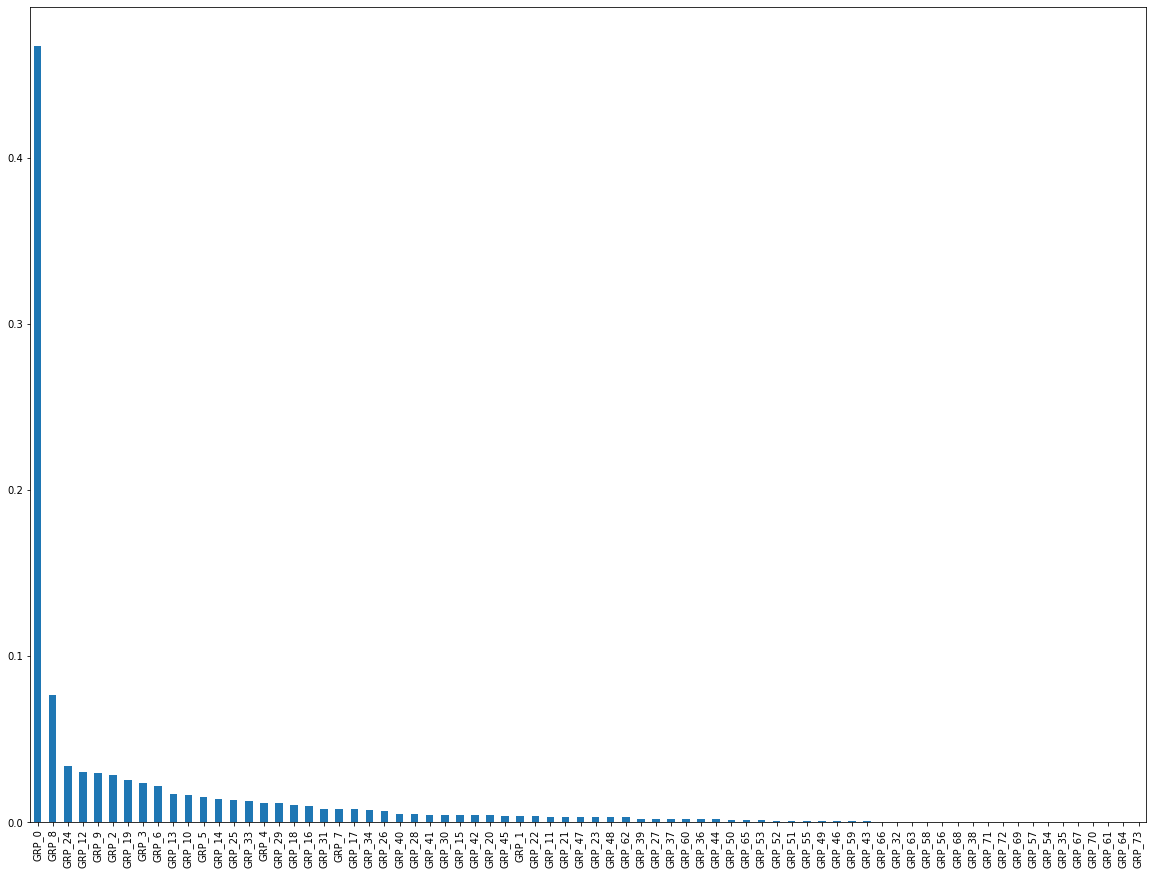

In [19]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts(normalize=True).plot(kind='bar')

In [20]:
display(dataset1['Assignment group'].value_counts(normalize=True))

GRP_0     0.467387
GRP_8     0.076631
GRP_24    0.033860
GRP_12    0.030533
GRP_9     0.029939
GRP_2     0.028633
GRP_19    0.025544
GRP_3     0.023761
GRP_6     0.021742
GRP_13    0.017227
GRP_10    0.016633
GRP_5     0.015207
GRP_14    0.014019
GRP_25    0.013782
GRP_33    0.012712
GRP_4     0.011881
GRP_29    0.011524
GRP_18    0.010455
GRP_16    0.010099
GRP_31    0.008198
GRP_7     0.008079
GRP_17    0.008079
GRP_34    0.007366
GRP_26    0.006653
GRP_40    0.005346
GRP_28    0.005228
GRP_41    0.004752
GRP_30    0.004633
GRP_15    0.004515
GRP_42    0.004396
GRP_20    0.004277
GRP_45    0.004158
GRP_1     0.003683
GRP_22    0.003683
GRP_11    0.003564
GRP_21    0.003327
GRP_47    0.003208
GRP_23    0.002970
GRP_48    0.002970
GRP_62    0.002970
GRP_39    0.002257
GRP_27    0.002139
GRP_37    0.001901
GRP_60    0.001901
GRP_36    0.001782
GRP_44    0.001782
GRP_50    0.001663
GRP_65    0.001307
GRP_53    0.001307
GRP_52    0.001069
GRP_51    0.000950
GRP_55    0.000950
GRP_49    0.

In [21]:
# Top 5 callers in each assignment group
top_n = 5
df_sample2 = dataset1['Caller'].groupby(dataset1['Assignment group']).value_counts()
caller_grp = pd.DataFrame(df_sample2.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     126
                 rbozivdq gmlhrtvp      71
                 olckhmvx pcqobjnd      47
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

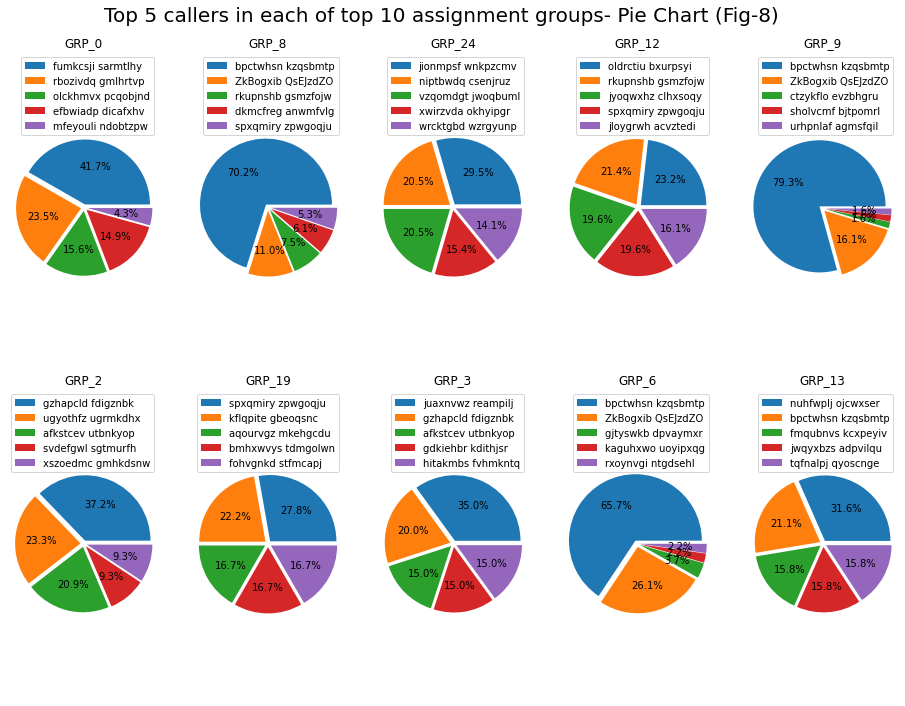

In [22]:
# Visualize Top 5 callers in each of top 10 assignment groups
top_n = 10
df_sample3 = pd.DataFrame(dataset1.groupby('Assignment group').size(),columns = ['Count']).reset_index()
top_grps = df_sample3.nlargest(top_n, 'Count')['Assignment group'].tolist()

fig_cols = 5
fig_rows = int(np.ceil(top_n/fig_cols))
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,9.5))
fig.suptitle('Top 5 callers in each of top 10 assignment groups- Pie Chart (Fig-8)', y=1, va= 'bottom', size='20')
for row in range(fig_rows):
    for col in range(fig_cols):
        grp_n = fig_cols * row + col
        if grp_n < top_n:
            xs = caller_grp.xs(top_grps[grp_n])
            _ = axes[row,col].pie(xs, autopct='%1.1f%%', explode=[0.05]*5)
            axes[row,col].legend(labels=xs.index,loc="best")
            axes[row,col].axis('equal')
            axes[row,col].set_title(top_grps[grp_n])

plt.tight_layout()

In [12]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False

In [13]:
# Check the dataset for mojibake impact
dataset1[~dataset1.iloc[:,:].applymap(is_mojibake_impacted).all(1)]

,Short description,Description,Caller,Assignment group
99,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,GRP_0
116,server issues,\r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...,bgqpotek cuxakvml,GRP_0
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,GRP_0
162,access to bex,\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail...,yfqoaepn xnezhsit,GRP_0
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0
170,[urgent!!] delivery note creation request!!,\n\nreceived from: fbvpcytz.nokypgvx@gmail.com...,fbvpcytz nokypgvx,GRP_18
177,unable to access password_management_tool id p...,i try to change now my password acc. to attach...,ijeqpkrz nwtehsyx,GRP_2
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...,"from: \nsent: friday, october 28, 2016 7:20 a...",yafxlpwi lhxvatkb,GRP_18
222,support fÃ¼r fa.gstry \arexjftu ohxdwngl,support fÃ¼r fa.konnica \arexjftu ohxdwngl,arexjftu ohxdwngl,GRP_24
223,probleme mit bluescreen .,"hallo ,\n\nes ist erneut passiert. der pc hat ...",vrfpyjwi nzhvgqiw,GRP_24


In [14]:
dataset1['Short description']=dataset1['Short description'].apply(fix_text)
dataset1['Description']=dataset1['Description'].apply(fix_text)

In [15]:
dataset1.loc[7581]

Short description    vpn 不能登录,网页一直在检查防病毒软件。
Description          vpn 不能登录,网页一直在检查防病毒软件。
Caller                    eokwmfay ewbltgha
Assignment group                     GRP_31
Name: 7581, dtype: object

In [16]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'

In [17]:
dataset1['Language'] = dataset1['Description'].apply(fn_lan_detect)

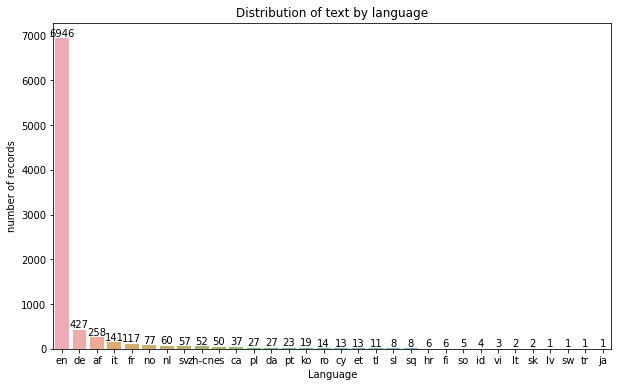

In [23]:
x = dataset1["Language"].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

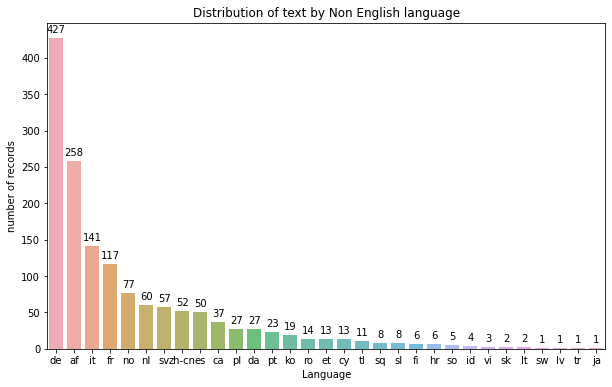

In [24]:
dataset1_nonEnglish = pd.DataFrame(dataset1[dataset1["Language"]!='en'])

x = dataset1_nonEnglish["Language"].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by Non English language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [25]:
dataset1['Language'].value_counts()

en       6946
de        427
af        258
it        141
fr        117
no         77
nl         60
sv         57
zh-cn      52
es         50
ca         37
pl         27
da         27
pt         23
ko         19
ro         14
cy         13
et         13
tl         11
sl          8
sq          8
hr          6
fi          6
so          5
id          4
vi          3
lt          2
sk          2
sw          1
tr          1
lv          1
ja          1
Name: Language, dtype: int64

In [26]:
email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [27]:
def fn_remove_irrelaventWords(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()                                       # to lower case 
    df[columnName][index] = re.sub(email_regex,"",df.loc[index,columnName])                     # remove email address
    df[columnName][index] = re.sub(r'\S*@\S*\s?', '', df.loc[index,columnName])                 # remove email address with appended text
    df[columnName][index] = re.sub(r"received from:",' ',df.loc[index,columnName])              # remove unwanted text
    df[columnName][index] = re.sub(r"from:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"to:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"subject:",' ',df.loc[index,columnName])                    # remove unwanted text  
    df[columnName][index] = re.sub(r"sent:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"ic:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"cc:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"bcc:",' ',df.loc[index,columnName])                        # remove unwanted text  
    df[columnName][index] = re.sub(r'\d+','' ,df.loc[index,columnName])                         # remove numbers
    df[columnName][index] = re.sub(r'\n',' ',df.loc[index,columnName])                          # remove new line character
    df[columnName][index] = re.sub(r'#','', df.loc[index,columnName])                           # remove hashtag while keeping hashtag text
    df[columnName][index] = re.sub(r'&;?', 'and',df.loc[index,columnName])                      # remove &
    df[columnName][index] = re.sub(r'\&\w*;', '', df.loc[index,columnName])                     # remove HTML special entities (e.g. &amp;)
    df[columnName][index] = re.sub(r'https?:\/\/.*\/\w*', '', df.loc[index,columnName])         # remove hyperlinks
    df[columnName][index] = re.sub(r"hello",' ',df.loc[index,columnName])                       # remove 'hello' word
    df[columnName][index] = re.sub(r"_",' ',df.loc[index,columnName])                           # remove _
    df[columnName][index] = re.sub(r"-",' ',df.loc[index,columnName])                           # remove -
    df[columnName][index] = re.sub(r",",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"\(",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"\)",' ',df.loc[index,columnName])
  return df

In [28]:
df_clean = dataset1.reset_index()

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              8417 non-null   int64 
 1   Short description  8417 non-null   object
 2   Description        8417 non-null   object
 3   Caller             8417 non-null   object
 4   Assignment group   8417 non-null   object
 5   Language           8417 non-null   object
dtypes: int64(1), object(5)
memory usage: 394.7+ KB


In [30]:
df_clean = fn_remove_irrelaventWords(df_clean,'Description')
df_clean = fn_remove_irrelaventWords(df_clean,'Short description')

In [31]:
df_clean.tail(20)

,index,Short description,Description,Caller,Assignment group,Language
8397,8480,customer group enhanced field,a business decision has recently bee...,nlearzwi ukdzstwi,GRP_9,en
8398,8481,ess portal,hi team i was going into the ess file ...,eagvusbr nguqityl,GRP_9,en
8399,8482,robot hostname is inactive,robot hostname is inactive,rkupnshb gsmzfojw,GRP_8,en
8400,8483,fw: case id [ref: case :ref] :: others,pacvbetl yptglhoe thursday august : p...,pacvbetl yptglhoe,GRP_0,en
8401,8484,please remove user hugcadrn ixhlwdgt ralfteim...,please remove user hugcadrn ixhlwdgt ralfteim...,hugcadrn ixhlwdgt,GRP_2,en
8402,8485,ticket update on inc to user hbmwlprq ilfvyodx,ticket update on inc to user hbmwlprq ilfvyodx,fumkcsji sarmtlhy,GRP_0,en
8403,8486,ticket update on ticket no,ticket update on ticket no,fumkcsji sarmtlhy,GRP_0,sv
8404,8487,telephony software is missing from pc,pc received multiple windows security updates ...,pvbomqht smfkuhwi,GRP_3,en
8405,8488,erp account unlock,name:mfeyouli ndobtzpw language: browser:micro...,rbozivdq gmlhrtvp,GRP_0,en
8406,8489,account locked,account locked,sdvlxbfe ptnahjkw,GRP_0,en


In [32]:
df_clean = df_clean.drop(columns=['index'],axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
 4   Language           8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [41]:
def fn_removeCaller(df,columnName):
  for index in range(df.shape[0]):
    if (df['Caller'][index] in df[columnName][index]):
      df[columnName][index] = df[columnName][index].replace(df['Caller'][index],"person")
    if (df['Caller'][index].replace(" ","") in df[columnName][index]):
      df[columnName][index] = df[columnName][index].replace(df['Caller'][index].replace(" ",""),"person")
  return df

In [42]:
df_clean = fn_removeCaller(df_clean,'Description')
df_clean = fn_removeCaller(df_clean,'Short description')

In [44]:
df_clean.tail(10)

,Short description,Description,Caller,Assignment group,Language
8407,check status in purchasing,please contact ed pasgryowski pasgryo about ...,mpihysnw wrctgoan,GRP_29,en
8408,vpn for laptop,i need a vpn for my new laptop. name llv...,jxgobwrm qkugdipo,GRP_34,en
8409,hr tool etime option not visitble,hr tool etime option not visitble,tmopbken ibzougsd,GRP_0,en
8410,erp fi ob two accounts to be added,i am sorry i have another two accounts that n...,ipwjorsc uboapexr,GRP_10,en
8411,tablet needs reimaged due to multiple issues w...,tablet needs reimaged due to multiple issues w...,cpmaidhj elbaqmtp,GRP_3,en
8412,emails not coming in from zz mail,good afternoon i am not receiving the e...,avglmrts vhqmtiua,GRP_29,en
8413,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,GRP_0,en
8414,vip: windows password reset for tifpdchb pedxruyf,vip: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0,en
8415,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,en
8416,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,de


In [45]:
df_clean.to_excel("df_clean_LangDetected.xlsx")


Using the GoSlate Library, we have Translated all the languages to English and verified it using Google Translator

Directly importing the Translated dataset

In [60]:
#svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
#svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [ ]:
#gs = Goslate(service_urls=svc_urls)
#trans_8416 = gs.translate(df_clean['Description'][8416], target_language='en', source_language='auto')

In [ ]:
#print ('Original Text : ',df_clean['Description'][8416])
#print('Traslated to English : ',trans_8416)

In [ ]:
#def fn_ConvertToEnglish(df,columnName):
#  for idx in range(df.shape[0]):
#    row_iter = gs.translate(df[columnName][idx],target_language='en',source_language = 'auto')
#    df[columnName][idx] = str(row_iter)
#  return df

In [ ]:
#df_lang = fn_ConvertToEnglish(df_clean,'Description')
#df_lang = fn_ConvertToEnglish(df_clean,'Short description')

In [ ]:
#df_lang.to_excel("df_clean_LangDetected_Translated.xlsx")

In [46]:
df_lang = pd.read_excel("/content/df_clean_LangDetected_Translated.xlsx")

In [47]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         8417 non-null   int64 
 1   Short description  8417 non-null   object
 2   Description        8417 non-null   object
 3   Caller             8417 non-null   object
 4   Assignment group   8417 non-null   object
 5   Language           8417 non-null   object
dtypes: int64(1), object(5)
memory usage: 394.7+ KB


In [48]:
df_lang = df_lang.drop(columns=['Unnamed: 0'],axis=1)

In [49]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
 4   Language           8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [50]:
df_lang[pd.isnull(df_lang).any(axis=1)]

,Short description,Description,Caller,Assignment group,Language


In [51]:
df_lang.fillna(str(), inplace=True)
df_lang.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
Language             0
dtype: int64

In [52]:
df_lang.insert(loc=4, 
              column='combined_description', 
              allow_duplicates=True, 
              value=list(df_lang['Short description'].str.strip() + ' ' + df_lang['Description'].str.strip()))

In [53]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
 5   Language              8417 non-null   object
dtypes: object(6)
memory usage: 394.7+ KB


In [54]:
df_lang.head()

,Short description,Description,Caller,Assignment group,combined_description,Language
0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details. employee an...,en
1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings/skype meetings etc ar...,en
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to vpn best,en
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no


In [55]:
def fn_remove_irrelaventWords_LevelTwo(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()                                       # to lower case 
    df[columnName][index] = df[columnName][index].replace("// ::",' ')
    df[columnName][index] = df[columnName][index].replace("<",' ')
    df[columnName][index] = df[columnName][index].replace(">",' ')
    df[columnName][index] = df[columnName][index].replace(";",' ')
    df[columnName][index] = df[columnName][index].replace(".",' ')
    df[columnName][index] = df[columnName][index].replace("•",' ')
    df[columnName][index] = df[columnName][index].replace("?",' ')
    df[columnName][index] = df[columnName][index].replace("\\",' ')
    df[columnName][index] = df[columnName][index].replace("\/",' ')
    df[columnName][index] = df[columnName][index].replace(":",' ',)
    df[columnName][index] = df[columnName][index].replace("%",' ',)
    df[columnName][index] = df[columnName][index].replace("=",' ',)
    df[columnName][index] = df[columnName][index].replace("[mail ]",' ')
    df[columnName][index] = df[columnName][index].replace("[",' ')
    df[columnName][index] = df[columnName][index].replace("]",' ')
    df[columnName][index] = df[columnName][index].replace("< mail >",' ')
    df[columnName][index] = df[columnName][index].replace("+",' ')
    df[columnName][index] = df[columnName][index].replace("\"",' ')
  return df

In [56]:
df_lang_clean = fn_remove_irrelaventWords_LevelTwo(df_lang,"combined_description")

In [58]:
df_lang_clean.head(20)

,Short description,Description,Caller,Assignment group,combined_description,Language
0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee an...,en
1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings/skype meetings etc ar...,en
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to vpn best,en
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,en
6,event: critical:hostname .company.com the valu...,event: critical:hostname .company.com the valu...,jyoqwxhz clhxsoqy,GRP_1,event critical hostname company com the valu...,en
7,ticket no employment status new non employee [...,ticket no employment status new non employee [...,eqzibjhw ymebpoih,GRP_0,ticket no employment status new non employee ...,en
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,en
9,ticket update on inplant,ticket update on inplant,fumkcsji sarmtlhy,GRP_0,ticket update on inplant ticket update on inplant,en


In [59]:
df_lang_clean.to_excel("df_Moji_langDet_Translated_clean_combinedDesc.xlsx")

Deterministic Rules

In [61]:
def deterministicRules(df,columnName):
  for i in range(df.shape[0]):
      #1 Contains telephony_software > GRP_7
    if pd.notna(df[columnName][i]):
      if ('telephony software' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_7'
      #2 contains cutview >  GRP_66
      elif ('cutview' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_66'
      #3 contains engg application >  GRP_58
      elif ('engg application' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_58'
      #4 contains ethics >  GRP_23
      elif ('ethics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_23'
      # contains crm dynamics >  GRP_22
      elif ('crm dynamics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_22'
      # contains distributor tool & company center >  GRP_21
      elif ('distributor tool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      elif ('company center' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      # contains bpctwhsn kzqsbmtp & network outage or circuit outage >  GRP_8
      elif ((df['Caller'][i] == 'bpctwhsn kzqsbmtp' and ('network outage' in df[columnName][i]) or 'circuit outage' in df[columnName][i])):
        df['pred_group'][i] = 'GRP_8'
      elif ('reset passwords' in df[columnName][i] and 'the' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_17'
      elif (df[columnName][i].startswith('erp access issue')):
        df['pred_group'][i] = 'GRP_2'
      elif ('vsphere' in df[columnName][i] or 'esxi' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_12'
      elif ('windows account' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid account lock' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid password reset' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif(df['Caller'][i] == 'jionmpsf wnkpzcmv' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_24'
      elif(df['Caller'][i] == 'cwrikael oanmsecr' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('sso portal' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_73'
      elif ('unable complete forecast' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_67'
      elif (df[columnName][i].startswith('timecard') or df[columnName][i].startswith('time card')):
        df['pred_group'][i] = 'GRP_36'

In [62]:
df_lang_clean.insert(loc=5,column='pred_group',value=np.nan,allow_duplicates=True)

In [63]:
df_lang_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     8417 non-null   object 
 1   Description           8417 non-null   object 
 2   Caller                8417 non-null   object 
 3   Assignment group      8417 non-null   object 
 4   combined_description  8417 non-null   object 
 5   pred_group            0 non-null      float64
 6   Language              8417 non-null   object 
dtypes: float64(1), object(6)
memory usage: 460.4+ KB


In [64]:
deterministicRules(df_lang_clean,"combined_description")
df_determinted = df_lang_clean[~df_lang_clean['pred_group'].isna()]

In [65]:
df_determinted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 18 to 8413
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     557 non-null    object
 1   Description           557 non-null    object
 2   Caller                557 non-null    object
 3   Assignment group      557 non-null    object
 4   combined_description  557 non-null    object
 5   pred_group            557 non-null    object
 6   Language              557 non-null    object
dtypes: object(7)
memory usage: 34.8+ KB


In [66]:
df_determinted.head()

,Short description,Description,Caller,Assignment group,combined_description,pred_group,Language
18,erp sid account locked,erp sid account locked,nqdyowsm yqerwtna,GRP_0,erp sid account locked erp sid account locked,GRP_0,en
25,erp sid password reset,erp sid password reset,jqhtkfsm xoehtbnl,GRP_0,erp sid password reset erp sid password reset,GRP_0,af
49,status does not change on telephony software,"when closing a call the agent keeps on the ""on...",aofnvyzt eqiyskhm,GRP_7,status does not change on telephony software w...,GRP_7,en
80,erp sid account locked,erp sid account locked,ilvortuq zfgrlewm,GRP_0,erp sid account locked erp sid account locked,GRP_0,en
154,reset passwords for person using password mana...,"employee is getting an error ""user authenticat...",hckvpary emxbpkwy,GRP_17,reset passwords for person using password mana...,GRP_17,en


In [67]:
df_NonDet = df_lang_clean[df_lang_clean['pred_group'].isna()]

In [68]:
df_NonDet = df_NonDet.reset_index()
df_NonDet = df_NonDet.drop(columns=['index'],axis=1)
df_NonDet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   combined_description  7860 non-null   object
 5   pred_group            0 non-null      object
 6   Language              7860 non-null   object
dtypes: object(7)
memory usage: 430.0+ KB


We have Group till GRP_72. Now assigning GRP_99 to all merged groups having count <=10



In [70]:
df_NonDet.insert(loc=4,column='New Assignment Group',value=np.nan,allow_duplicates=True)

In [71]:
groupsToBeMerged = pd.DataFrame(df_NonDet['Assignment group'].value_counts() <=10)
groupsToBeMerged = groupsToBeMerged[groupsToBeMerged['Assignment group'] == True]
groupsToBeMergedList = list(groupsToBeMerged.index)
groupsToBeMergedList

['GRP_52',
 'GRP_55',
 'GRP_51',
 'GRP_49',
 'GRP_46',
 'GRP_59',
 'GRP_65',
 'GRP_43',
 'GRP_32',
 'GRP_63',
 'GRP_56',
 'GRP_68',
 'GRP_38',
 'GRP_71',
 'GRP_72',
 'GRP_69',
 'GRP_57',
 'GRP_54',
 'GRP_35',
 'GRP_23',
 'GRP_67',
 'GRP_70',
 'GRP_61',
 'GRP_58',
 'GRP_64',
 'GRP_66']

In [72]:
len(groupsToBeMergedList)

26

In [73]:
df_NonDet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7860 non-null   object 
 1   Description           7860 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  0 non-null      float64
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      object 
 7   Language              7860 non-null   object 
dtypes: float64(1), object(7)
memory usage: 491.4+ KB


In [74]:
for index in range(df_NonDet.shape[0]):
  if (df_NonDet['Assignment group'][index] in groupsToBeMergedList):
    df_NonDet['New Assignment Group'][index] = 'GRP_99'
  else:
    df_NonDet['New Assignment Group'][index] = df_NonDet['Assignment group'][index]

In [75]:
df_NonDet.tail(30)

,Short description,Description,Caller,Assignment group,New Assignment Group,combined_description,pred_group,Language
7830,hi it help team please unblock my new company ...,Person Friday August: At NWFODMHC ExurcWKM WG:...,ntydihzo aeptfbgs,GRP_0,GRP_0,hi it help team please unblock my new company ...,NaN,en
7831,can you unblock my account so i can use outloo...,nwfodmhc exurcwkm friday august : am prishry b...,eqzibjhw ymebpoih,GRP_0,GRP_0,can you unblock my account so i can use outloo...,NaN,en
7832,plant value added services one day pick route ...,request to phase in additional vas customers. ...,xnqzhtwu hivumtfz,GRP_18,GRP_18,plant value added services one day pick route ...,NaN,en
7833,The computer can't open the computer,TO Xiaohe morning computer can't open,xqyjztnm onfusvlz,GRP_30,GRP_30,the computer can't open the computer to xiaohe...,NaN,zh-cn
7834,ticket update,rakthyesh ramdntythanjesh friday august : am u...,eqzibjhw ymebpoih,GRP_0,GRP_0,ticket update rakthyesh ramdntythanjesh friday...,NaN,en
7835,outlook freezing because of crm addin,outlook freezing because of crm addin,crjhotyk pxslorbe,GRP_0,GRP_0,outlook freezing because of crm addin outlook ...,NaN,en
7836,inquiry about employee shesyhur posrt,inquiry about employee shesyhur posrt,pvlxjizg xzvlwqjc,GRP_0,GRP_0,inquiry about employee shesyhur posrt inquiry ...,NaN,en
7837,etime time card update information.,etime time card update information.,tmopbken ibzougsd,GRP_0,GRP_0,etime time card update information etime time...,NaN,it
7838,supply chain software account unlock and passw...,supply chain software account unlock and passw...,xjyuobma pzgqixlj,GRP_0,GRP_0,supply chain software account unlock and passw...,NaN,en
7839,can't login to bex analyzer through vpn urgent,best,cfzsajbe lyejkdho,GRP_0,GRP_0,can't login to bex analyzer through vpn urgent...,NaN,en


In [76]:
df_NonDet['New Assignment Group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_8',
       'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_18', 'GRP_19', 'GRP_2', 'GRP_20',
       'GRP_21', 'GRP_22', 'GRP_24', 'GRP_25', 'GRP_26', 'GRP_27',
       'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31', 'GRP_17', 'GRP_33',
       'GRP_34', 'GRP_99', 'GRP_36', 'GRP_37', 'GRP_39', 'GRP_40',
       'GRP_41', 'GRP_42', 'GRP_7', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62'], dtype=object)

In [77]:
df_NonDet['New Assignment Group'].value_counts()

GRP_0     3660
GRP_8      591
GRP_24     285
GRP_9      252
GRP_12     251
GRP_19     213
GRP_2      209
GRP_3      197
GRP_6      182
GRP_13     143
GRP_10     139
GRP_5      128
GRP_14     116
GRP_25     115
GRP_33     103
GRP_29      97
GRP_4       95
GRP_99      88
GRP_18      88
GRP_16      84
GRP_31      67
GRP_34      62
GRP_26      55
GRP_28      44
GRP_41      40
GRP_40      40
GRP_30      39
GRP_42      37
GRP_15      36
GRP_45      35
GRP_20      33
GRP_1       31
GRP_11      30
GRP_47      27
GRP_22      27
GRP_48      25
GRP_62      25
GRP_7       21
GRP_17      19
GRP_39      19
GRP_27      17
GRP_60      16
GRP_44      15
GRP_37      15
GRP_50      14
GRP_21      13
GRP_36      11
GRP_53      11
Name: New Assignment Group, dtype: int64